<a href="https://colab.research.google.com/github/itzrubyy/rain_prediction/blob/main/rain_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv('rainfall.csv')

In [55]:
df.tail(5)

,date,rainfall,temperature,humidity,wind_speed,weather_condition
49,2022-02-19,17.3,15.9,83.0,8.6,Rainy
50,2022-02-20,9.6,18.6,71.0,6.7,Rainy
51,2022-02-21,0.0,21.3,55.0,5.1,Sunny
52,2022-02-22,7.4,16.8,77.0,8.9,Rainy
53,Co,NaN,NaN,NaN,NaN,NaN


In [56]:
df.isnull().sum()

date                 0
rainfall             1
temperature          1
humidity             1
wind_speed           1
weather_condition    1
dtype: int64

In [57]:
df.dropna(inplace=True,axis=0)

In [58]:
df.isnull().sum()

date                 0
rainfall             0
temperature          0
humidity             0
wind_speed           0
weather_condition    0
dtype: int64

In [59]:
df.drop('date',axis=1,inplace=True)

In [60]:
df.head()

,rainfall,temperature,humidity,wind_speed,weather_condition
0,12.5,15.2,78.0,8.5,Rainy
1,8.2,17.8,65.0,5.2,Rainy
2,0.0,20.1,52.0,3.1,Sunny
3,3.7,18.6,71.0,6.7,Rainy
4,21.1,14.8,82.0,9.3,Rainy


In [61]:
df["weather_condition"].value_counts()

weather_condition
Rainy    42
Sunny    11
Name: count, dtype: int64

In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["weather_condition"] = le.fit_transform(df["weather_condition"])

In [63]:
import pickle

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

In [64]:
df["weather_condition"].value_counts()

#Rainy 0
#Sunny 1

weather_condition
0    42
1    11
Name: count, dtype: int64

In [65]:
df.drop('rainfall',axis=1,inplace=True)

In [66]:
df.head()

,temperature,humidity,wind_speed,weather_condition
0,15.2,78.0,8.5,0
1,17.8,65.0,5.2,0
2,20.1,52.0,3.1,1
3,18.6,71.0,6.7,0
4,14.8,82.0,9.3,0


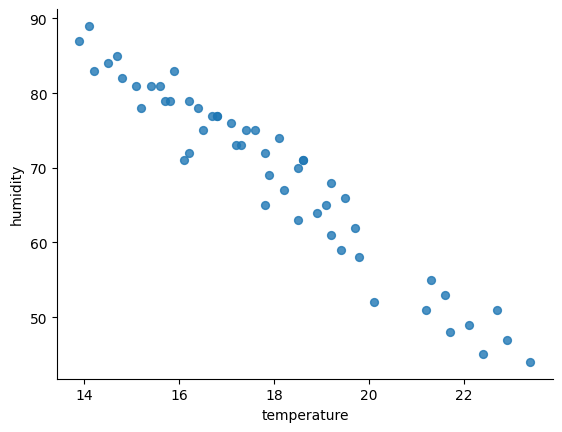

In [97]:
# @title temperature vs humidity

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='temperature', y='humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

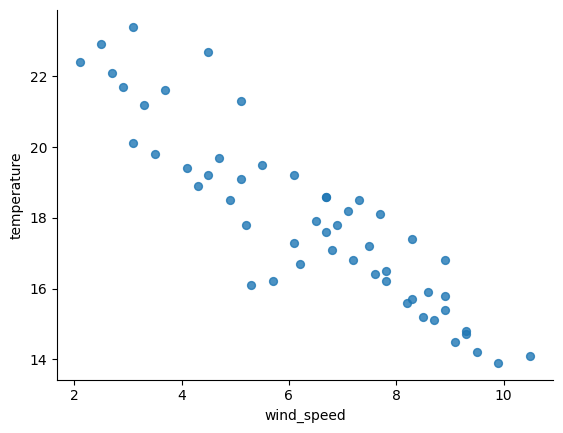

In [98]:
# wind speed vs temperature

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='wind_speed', y='temperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [67]:
X = df.drop('weather_condition',axis=1)
y = df['weather_condition']

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [70]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

logi_param = {'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10,100]}

model = LogisticRegression()
grid = GridSearchCV(model,logi_param,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
grid.best_params_
print(f"Best Parameters : {grid.best_params_}")
print(f"Best Score : {grid.best_score_}")
model.set_params(**grid.best_params_)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

Best Parameters : {'C': 1, 'penalty': 'l2'}
Best Score : 0.975


In [72]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [73]:
print(f"Accuracy Score : {accuracy_score(y_test,y_pred)*100}%")
print(f"Confusion Matrix : \n{confusion_matrix(y_test,y_pred)}")
print(f"Classification Report : \n{classification_report(y_test,y_pred)}")

Accuracy Score : 100.0%
Confusion Matrix : 
[[8 0]
 [0 3]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         3

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [74]:
df.head(1)

,temperature,humidity,wind_speed,weather_condition
0,15.2,78.0,8.5,0


In [89]:
test_data = {
    "temperature":"36",
    "humidity":"77",
    "wind_speed":"9",
}

test_df = pd.DataFrame(test_data,index=[0])

In [90]:
test_df

,temperature,humidity,wind_speed
0,36,77,9


In [91]:
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [92]:
test_df_scaled = scaler.transform(test_df)

In [93]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [94]:
result = model.predict(test_df_scaled)
result

array([1])

In [95]:
if result[0] == 0:
    print("Rainy")
else:
    print("Sunny")

Sunny
